# Effects of Users' Characteristics on Ride Duration
## by Gurnelius Terer





## Investigation Overview

>In this investigation, I was interested in finding out the best factors that could be used to predict the the duration of a ride. My main focus was on the user type, gender,  day of the week , the hour of the day and the rider's age.


## Dataset Overview

> The data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. It icludes data such as the duration of the ride, starting time, end time, station name, gender, and other valuable data.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

C:\Users\Admin\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Load the dataset
df = pd.read_csv("201902-fordgobike-tripdata_cleaned.csv")

## Distribution of Ride Duration

> Trip duration in the dataset take on a very large range of values, from about 1 minutes at the lowest, to about 1400 minutes at the highest. Plotted on a logarithmic scale, the distribution of diamond prices takes on a unimodal shape, with a peak at around 10 minutes.

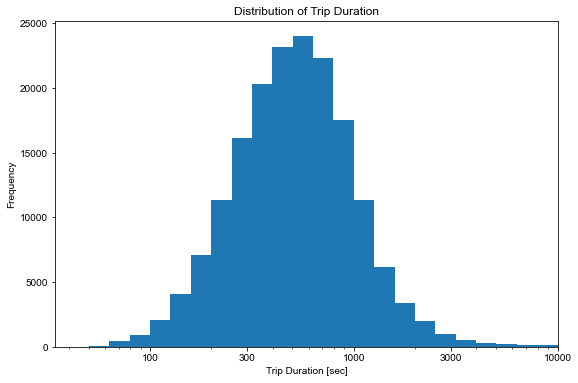

In [3]:
log_binsize = 0.1
bins = 10 ** np.arange(1.7,  np.log10(df['duration_sec']).max() + log_binsize, log_binsize)
ticks =  [100, 300, 1000, 3000, 10000, 30000, 100000]
labels = ['{}'.format(v) for v in ticks]

plt.figure(figsize=[9, 6])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlim(0, 10000)
plt.xlabel('Trip Duration [sec]')
plt.ylabel("Frequency")
plt.title('Distribution of Trip Duration')
plt.style.use("seaborn");

## Number of Rides By Hours of The Day

> The number of rides peak at 7 a.m in the morning and repeats at 5 p.m in the evening. This may possibly indicates that most users use the rideshare service to get to work in the morning and to return home in the evening.

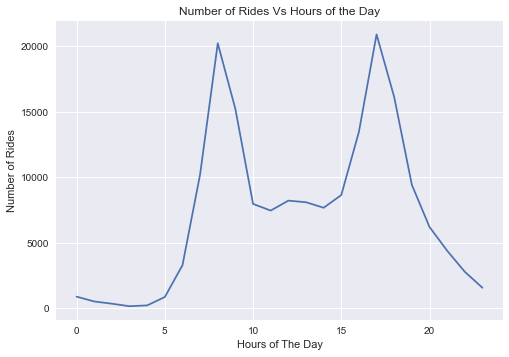

In [4]:
df_duration = (
        df["start_hour"]
        .value_counts() # Total counts for each hour
        .sort_index() # Sort by hour
    )


def plot_line(df, xlabel, ylabel, title):
    '''
    Plots a line graph
    
    Parameter:
    df: Pandas DataFrame/ Series
    xlabel: x-axis label 
    ylabel: y-axis label (Optional)
    title: title of the plot
    '''
    df.plot(kind="line")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title);
    

plot_line(df_duration, "Hours of The Day", "Number of Rides", "Number of Rides Vs Hours of the Day")

## Ride Duration Across Days of The Month

> For the month of February 2019, all weekends witnessed the longest ride duration with an average of about 15 minutes. The ride duration was particularly low on week days.

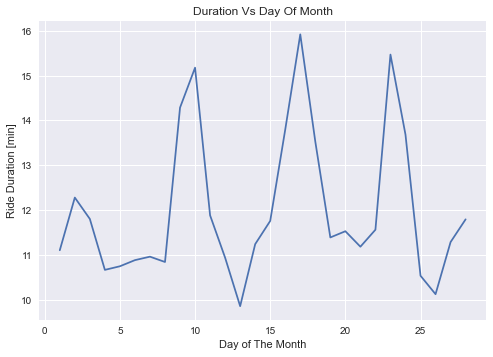

In [5]:
df_day_of_month = df.groupby("day_of_month")["duration_min"].mean();

plot_line(df_day_of_month, "Day of The Month", "Ride Duration [min]", "Duration Vs Day Of Month")

## Ride Duration by Days of The Week And User Type

> Customers take the longest rides on any day compared to subscibers. It is also concluded that for both user types, the longest rides are taken on weekends as compared to week days.

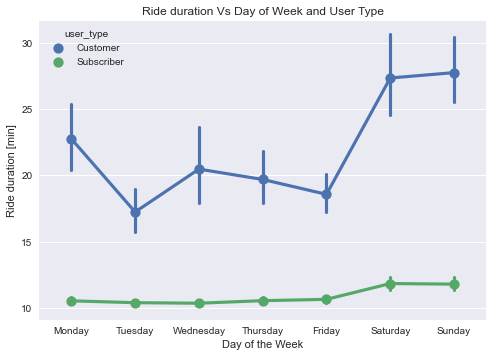

In [6]:
sns.pointplot(data = df, x = 'day_of_week', y='duration_min', hue = 'user_type')
ticks = np.arange(0,7)
labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.xlabel("Day of the Week")
plt.ylabel("Ride duration [min]")
plt.title("Ride duration Vs Day of Week and User Type")
plt.xticks(ticks, labels);

### Generate Slideshow
Use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Ford_GoBike_Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt